Nama Kelompok 2: Lucky Pradana (190120201043), Arif, Kevin

Dataset ini berasal dari project IoT monitoring suhu dan kelembaban serta kandungan Gas di daerah tanjung uban, bintan kepulauan riau. Namun untuk model yang akan diprediksi kita akan menganalisis suhu menggunakan RNN, untuk memprediksi suhu lingkungan tersebut

In [ ]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

# import library for build model 
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

# import library untuk data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
#Panggil file (load file bernama cleaned iot.csv) dan simpan dalam dataframe
dataset ="/content/drive/MyDrive/cleaned_iot.csv"
data = pd.read_csv(dataset)

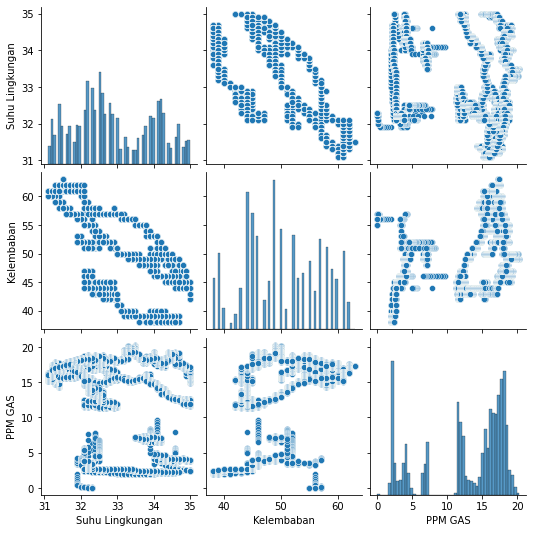

In [ ]:
sns.pairplot(data)

In [ ]:
# tampilkan 5 baris data 
data.head()

,Suhu Lingkungan,Kelembaban,PPM GAS
0,31.9,56.0,2.04
1,31.9,56.0,1.61
2,31.9,56.0,1.29
3,31.9,56.0,0.98
4,31.9,56.0,0.75


In [ ]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137204 entries, 0 to 137203
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Suhu Lingkungan  137204 non-null  float64
 1   Kelembaban       137204 non-null  float64
 2   PPM GAS          137204 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [ ]:
# Kolom 'temp' yang akan kita gunakan dalam membangun model
# Slice kolom 'temp' 

temp_data = data.iloc[:,0:1].values

In [ ]:
# cek output temp
temp_data           

array([[31.9],
       [31.9],
       [31.9],
       ...,
       [32.1],
       [32.1],
       [32.1]])

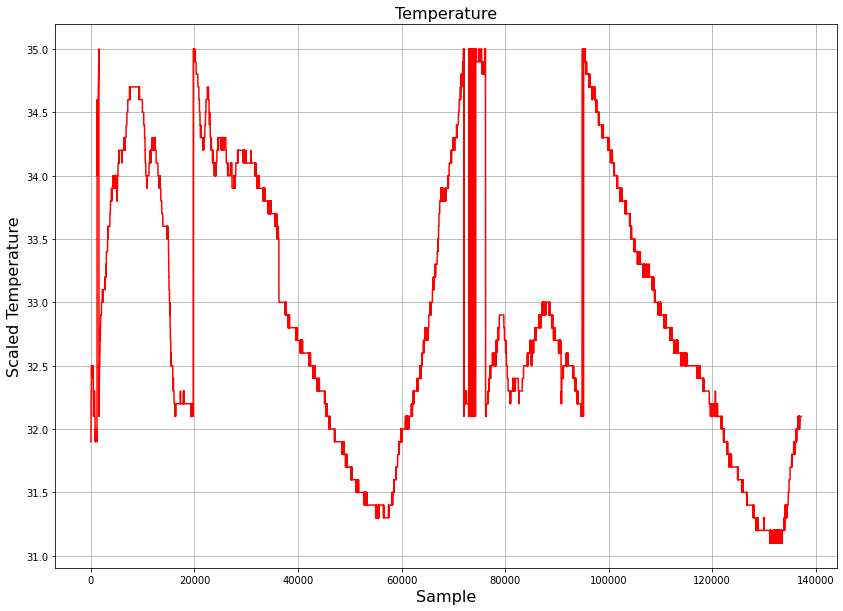

In [ ]:
# Visualizing temp_data

plt.figure(figsize=(14,10))                 
plt.plot(temp_data,c="red")
plt.title("Temperature",fontsize=16)
plt.xlabel("Sample",fontsize=16)
plt.ylabel("Scaled Temperature",fontsize=16)
plt.grid()
plt.show()

In [ ]:
# Menskalakan data antara 1 dan 0 (scaling) pada temp data
scaler = MinMaxScaler(feature_range=(0,1))           
temp_scaled = scaler.fit_transform(temp_data)

In [ ]:
# definisikan variabel step dan train 
step_size = 100
train_x = []
train_y = []

In [ ]:
# membuat fitur dan lists label

for i in range(step_size,137203):
    train_x.append(temp_scaled[i-step_size:i,0])
    train_y.append(temp_scaled[i,0])

In [ ]:
# mengonversi list yang telah dibuat sebelumnya ke array
train_x = np.array(train_x)
train_y = np.array(train_y)

In [ ]:
# cek dimensi data dengan function .shape
print(train_x.shape)                               

(137103, 100)


In [ ]:
# 130000 sampel terakhir akan digunakan dalam pengujian
# 7141 sampe pertama akan digunakan dalam pelatihan
test_x = train_x[130000:]           
train_x = train_x[:130000]         
test_y = train_y[130000:]  
train_y = train_y[:130000]

In [ ]:
# reshape data untuk dimasukkan kedalam Keras model
train_x = np.reshape(train_x, (130000, step_size, 1))
test_x = np.reshape(test_x, (7103, step_size, 1))

In [ ]:
# cek kembali dimensi data yang telah di reshape dengan function .shape
print(train_x.shape)
print(test_x.shape)                            

(130000, 100, 1)
(7103, 100, 1)


In [ ]:
# buat varibel penampung model LSTM
lstm_model = Sequential()

In [ ]:
# Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.15
lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

# Add a Dense layer with 2 units.
lstm_model.add(Dense(1))

ValueError: ignored

In [ ]:
# menambahkan loss function kedalam model lstm dengan tipe MSE
lstm_model.compile(optimizer="adam",loss="MSE")

In [ ]:
# fit lstm model, dengan epoch 10 dan batch size 30
lstm_model.fit(train_x,train_y,epochs=10,batch_size=30)

Epoch 1/10
4334/4334 [==============================] - 262s 61ms/step - loss: 0.0026
Epoch 2/10
4334/4334 [==============================] - 261s 60ms/step - loss: 0.0018
Epoch 3/10
4334/4334 [==============================] - 261s 60ms/step - loss: 0.0013
Epoch 4/10
4334/4334 [==============================] - 262s 60ms/step - loss: 0.0013
Epoch 5/10
4334/4334 [==============================] - 264s 61ms/step - loss: 0.0012
Epoch 6/10
4334/4334 [==============================] - 262s 60ms/step - loss: 0.0012
Epoch 7/10
4334/4334 [==============================] - 262s 61ms/step - loss: 0.0012
Epoch 8/10
4334/4334 [==============================] - 262s 60ms/step - loss: 0.0012
Epoch 9/10
4334/4334 [==============================] - 262s 60ms/step - loss: 0.0012
Epoch 10/10
4334/4334 [==============================] - 262s 60ms/step - loss: 0.0012


In [ ]:
# Prediksi Model LSTM
lstm_predictions = lstm_model.predict(test_x)
lstm_score = r2_score(test_y,lstm_predictions)

ValueError: ignored

In [ ]:
lstm_predictions

array([[0.02355278, 0.02355283],
       [0.02354768, 0.02354765],
       [0.02354386, 0.0235438 ],
       ...,
       [0.25343376, 0.25343376],
       [0.25343376, 0.25343376],
       [0.25343376, 0.25343376]], dtype=float32)

In [ ]:
lstm_score

In [ ]:
# Cetak nilai prediksi masing-masing model dengan menggunakan r^2 square
print("R^2 Score dari LSTM",lstm_score)

NameError: ignored

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

TypeError: ignored

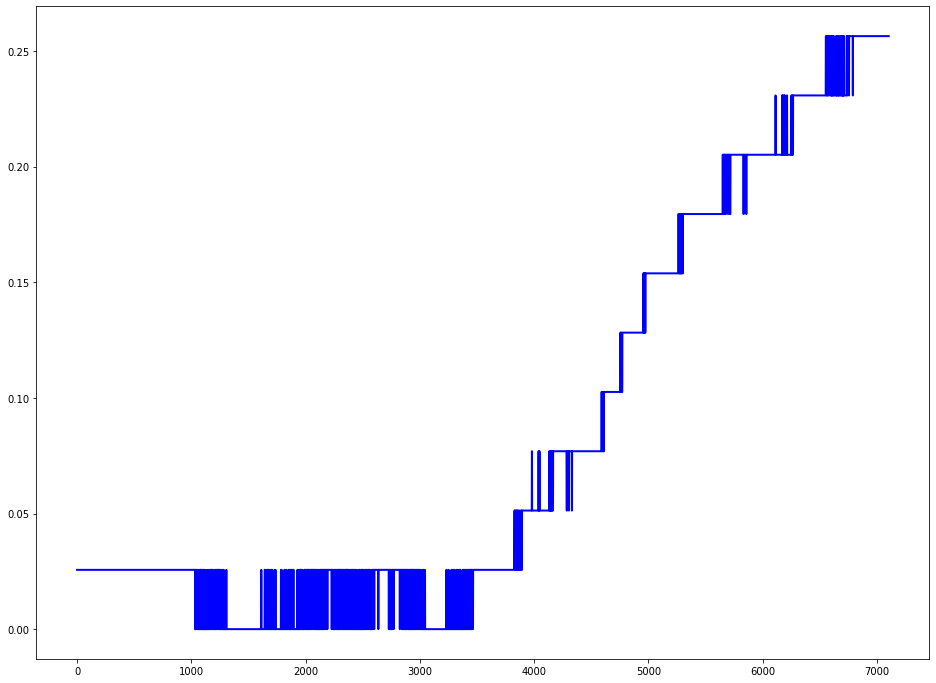

In [ ]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(reconstructed_model, c="red",linewidth=2, label="LSTM")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()

In [ ]:
from keras.models import load_model
lstm_model.save('model.h5')

In [ ]:
import pickle
pickle.dump (lstm_model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://540ac1d4-d4eb-41a5-8cd8-566a2135f3e3/assets


INFO:tensorflow:Assets written to: ram://540ac1d4-d4eb-41a5-8cd8-566a2135f3e3/assets


In [ ]:
from keras.models import load_model
reconstructed_model = load_model("model.h5")

In [ ]:
reconstructed_model.predict(test_x)

array([[0.02355278, 0.02355283],
       [0.02354768, 0.02354765],
       [0.02354386, 0.0235438 ],
       ...,
       [0.25343376, 0.25343376],
       [0.25343376, 0.25343376],
       [0.25343376, 0.25343376]], dtype=float32)